# End to End Classification Heart Disease Problem

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

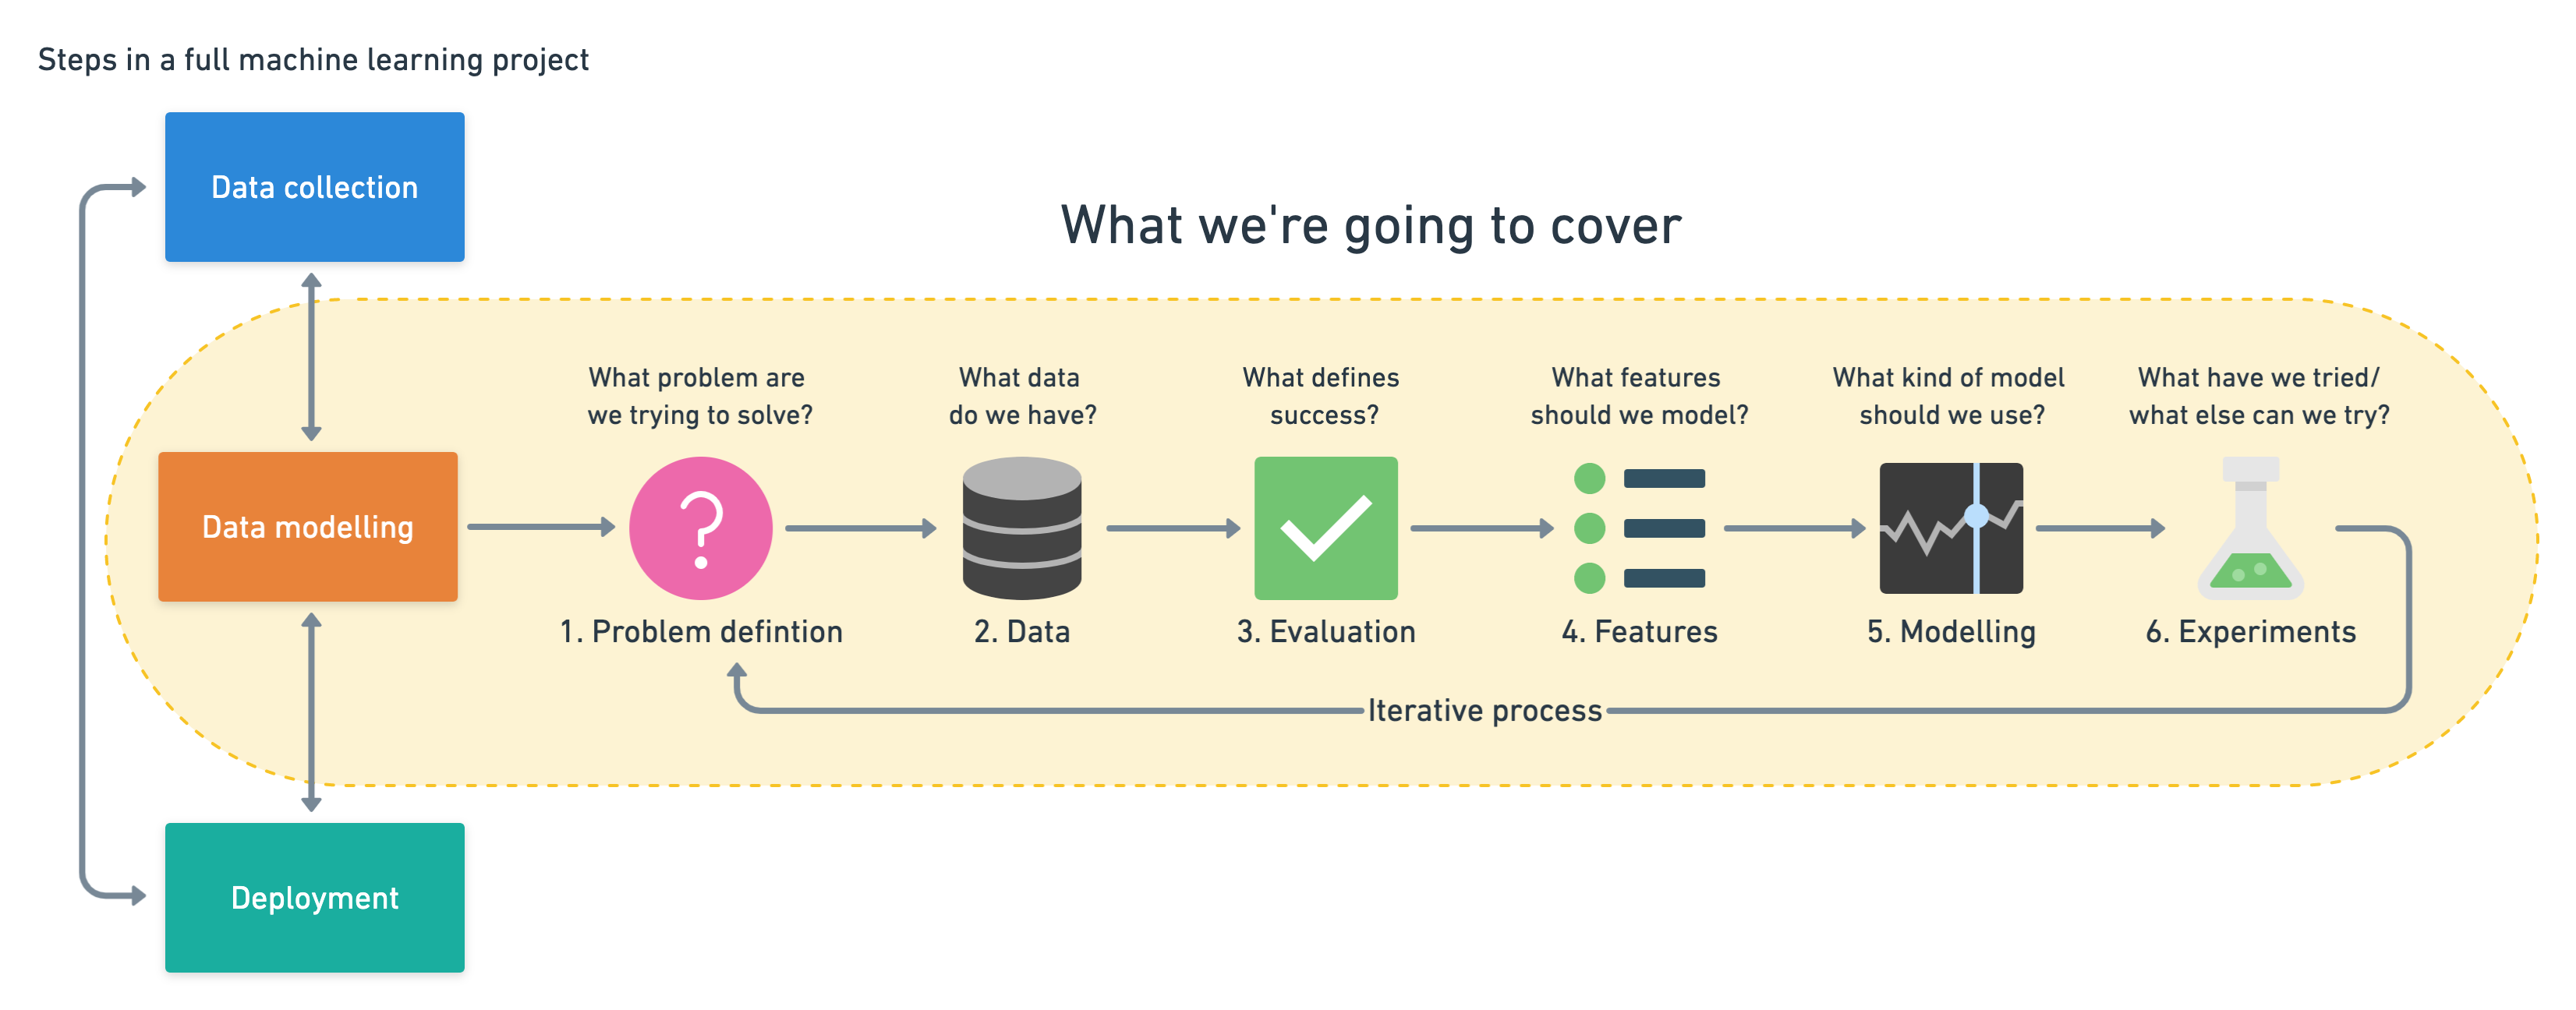

In [1]:
from IPython.display import Image
Image("images/ML-Framework.png")

# 1. Problem Definition
This workbook intend to use binary classification to prove an answer to the following:
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data

Original data source: [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

# 3. Evaluation
The evaluation metric for this project is to be defined as: 

> In the event of a 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

However, due to the nature of experimentation, the evaluation metric may change over time.

# 4. Features

Definitions for our features are evidenceable in the data dictionary below: 

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

# 5. Exploring Data

In [95]:
# Standard Operations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Evaluating & K-Fold
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

# Predicting 
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report

### 5. 1 Loading dependencies

In [3]:
df = pd.read_csv("./data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 5.2 Initial Assumptions

In order to proceed effectively it's important to have a level of domain-centric knowledge. I.e. Initial Assumptions. To do this we can plot some simple feature vs target outcomes. We'll derive this from our data dictionary.

#### Initial Assumptions - Building Simple Assumptions 

In [6]:
df.target.value_counts(normalize=True) * 100

1    54.455446
0    45.544554
Name: target, dtype: float64

This tells me that 54% of the sample data does have heart disease and 45% doesnt.

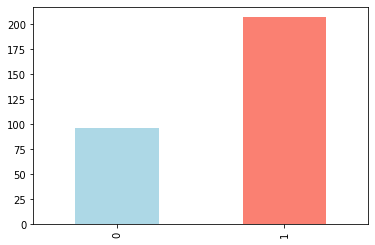

In [7]:
df.sex.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

This tells me that we have 207 males, 96 females 54% of the sample data does have heart disease and 45% doesnt.

However, a more effective way to analyse the data would be via cross-tabbing i.e. bring in two columns of data. In this case that's sex and target. Since we now understand that 54% of our data has heart disease, 207 of which are male and 98 are female. That will allow us to make target predictions based on gender. 

#### Crosstabbing Assumptions - Correlating Simple Assumptions 

In [8]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


So rough assumptions here would be: 
* There's almost 100 women ergo there's a 70-75% chance of a woman from our sample having heart disease.
* There's slightly more than 200 men 40-45% chance a man from our sample has heart disease

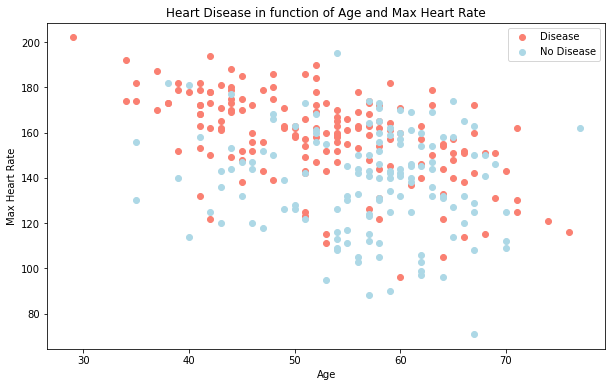

In [9]:
plt.figure(figsize=(10,6))

# Positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

So after plotting our cross-tab we're able to infer the following, those with higher heart rates, at a younger age are more likely to have heart disease.

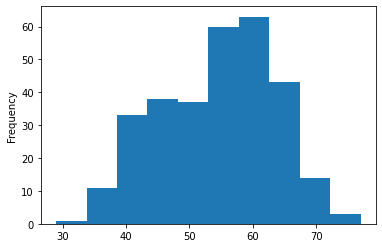

In [10]:
# To confirm this let's understand the average age of our sample. 
df.age.plot.hist();

#### Initial Assumptions - Correlations

Correlations are our final trick. They allow us the compare all variables in one swoop, providing insight into how variables relate to one another and in particular our target value. 

In [11]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


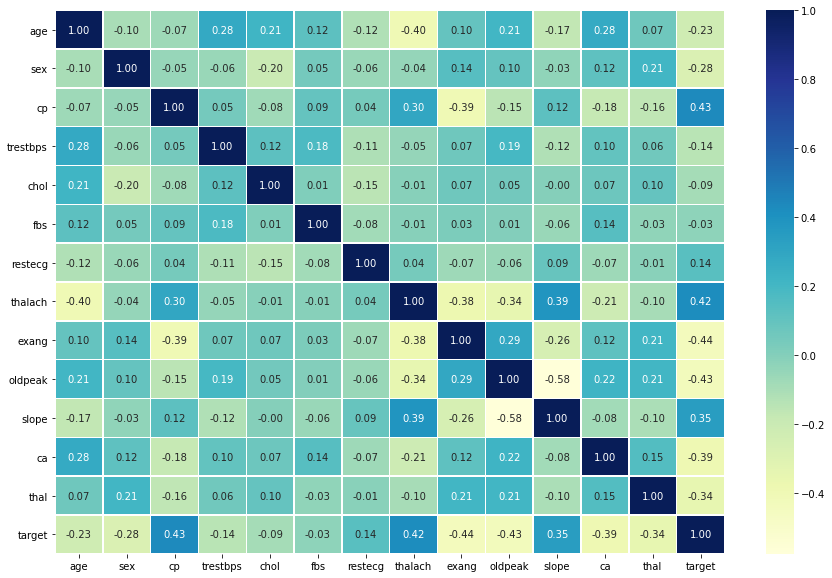

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap = "YlGnBu");

# 6. Modelling 

Let's remind ourselves of the problem & evaluation statements. What are we trying to achieve?
> Problem: Given clinical parameters about a patient, can we predict whether or not they have heart disease?

> Evaluation: In the event of a 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

Here's the plan when it comes to Modelling:
* Perform a sanity check on our data 
* Split our data into test and train
* Create model dictionary & an object to hold results. Looping through data and apply models
* Train, test and score.
* Hypertune

### 6.1 Sanity Check

In [13]:
## For sanity let's evaluate the completeness of our data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 6.2 Splitting Data

In [24]:
## So there's no imputing or column transformation required we can simply dive in with our modelling.

np.random.seed(42)
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

models = {
    "LinearSVC": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

results = {}

for model_name, model in models.items(): 
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

/Users/tomlynch/Documents/code/ds/end-to-end-classification-problem/env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'LinearSVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'SVC': 0.7049180327868853,
 'RandomForestClassifier': 0.8524590163934426}

Choosing to ignore this error for now and increase the number of iterations at the GridSearchCV stage. 

### 6.3 Plotting Models

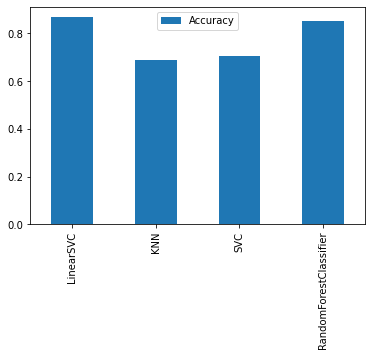

In [17]:
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

Since our cut-off is 85% technically we've found a model that surpasses the required level of precision. We can conclude our work here. Except for two small refinements. 
1. Let's convert the fitting/scoring process into a function
2. Let's try some brief hypertuning.

# 7. Tuning

Here's the plan: 
1. Quick tuning: RandomizedSearchCV
2. Comprehensive tuning: GridSearchCV

### 7.1 Quick Tuning - RandomizedSearchCV 

#### 7.1.1 Tuning - LogisticRegression aka Model 1

In [18]:
# Set up a hyperparameter grid of variables we plan to change

# LogisticRegression Hyperparameters Grid
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);
rs_log_reg.best_params_
rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


0.8852459016393442

#### 7.1.1 Tuning - RandomForsestClassifier aka Model 2

In [19]:
np.random.seed(42)

# RandomForestClassifier Hyperparameters Grid
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20, 
                           verbose = True)
rs_rf.fit(X_train,y_train)
rs_rf.best_params_
rs_rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.4s finished


0.8688524590163934

### 7.2 Deep Tuning - GridSearchCV 

#### 7.2.1 Tuning - LogisticalRegression aka Model 1

In [20]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);
gs_log_reg.best_params_
gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


0.8852459016393442

No difference in pre/post GridSearchCV tuning since LogisitcalRegression maxes out at 20 hyperparameter combinations anyway.

#### 7.2.2 Tuning - RandomForestClassifier aka Model 2

In [21]:
np.random.seed(42)

# RandomForestClassifier Hyperparameters Grid
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv = 5,
                           verbose = True)
rs_rf.fit(X_train,y_train)
rs_rf.best_params_
rs_rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


KeyboardInterrupt: 

# 8. Evaluating Beyond Accuraccy

Since we want to evaluate a Classification Model we'll need the following tools along with some predictions. 

* Accuracy
* ROC Curve
* Confusion Matrix 
* Classification Report 
    * Precision
    * Recall 
    * F1 - Score
* K-Fold

### 8.1 - Predictions

Predictions are always made against test data and it's good to confirm it's different to our actual test data (in reality it should be since we're predicting.

In [101]:
y_preds = gs_log_reg.predict(X_test)
y_preds.size

61

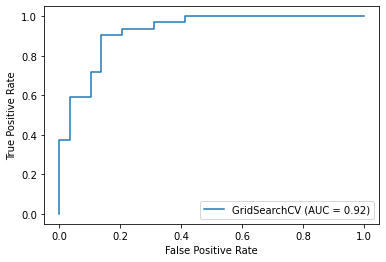

In [35]:
plot_roc_curve(gs_log_reg, X_test,y_test);

An Area Under Curve (AUC) of 0.92 isn't bad. But 1 is perfect so we for this non-time bound example. We continue.

### 8.2 - Confusion Matrix 

A correctly constructed confusion matrix shows our FPR vs TPR

In [57]:
(confusion_matrix(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


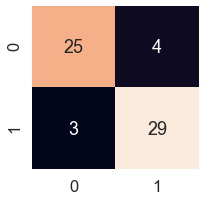

In [60]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborns heatmap().
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
plot_conf_mat(y_test, y_preds)

## 8.3 - Classification Report 

In [89]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



PRF1 - Precision/Recall/F1_Score

Precision: Number of false positives 
Recall: Number of false negatives
F1 Score: A combination of the above. 
    
This is where domain knowledge is key and must be applied since with classification problems being binary, accidentally sending a letter to somebody saying they have heart disease isn't too bad. But not sending on is unacceptable.

## 8.4 - Cross Validation Scoring (K-Fold)

In [65]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [67]:
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [72]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [73]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [74]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [75]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [78]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

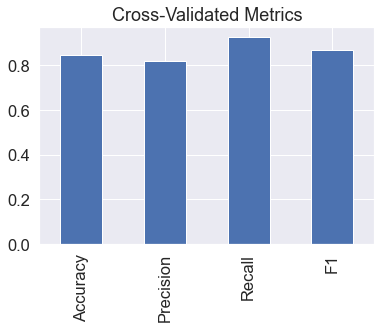

In [82]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# 9 - Feature-Prediction Dictionaries

In the context of our model we were simply required to consume all the patients medical characteristics to determine the target outcome. This was done so with little regard for the importance of featuring weighting. Naturally different models evaluate differently based on their search patterns. You can extract the features most priortised by a model as such.

In [84]:
#### 9.1 - Calculating feature co-efficients
clf.fit(X_train, y_train)
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

This matrix shows how much each feature is contributing to our model patterns.

In [86]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

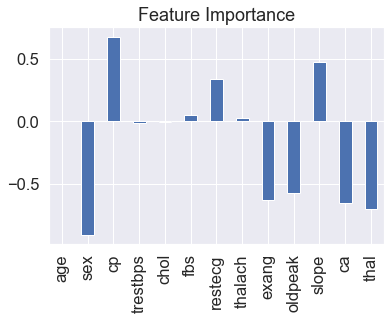

In [87]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

We can now use this feature-prediction dictionary to inform our choices and infer the outcomes the model has arrived at. 

# 10 - Saving and Exporting

Naturally we'll be using Pickle. 

In [94]:
pickle.dump(gs_log_reg, open("output-models/gs_log_reg_model.pkl", "wb"))

# 11 - Conclusion

Once we've built a feature-dictionary to better understand our data. Providing we can conclude the model adheres to our original requirements we can move on. If not we can look at: 
* Collecting better/more data
* Testing a better model 
* Improving the current model?

## 12 - Implementation
At this point we know how accurate our model would be based on pre-agreed, known test values. 
What we haven't done is called it into action so that we actually give it a new data set and get it to predict some outcomes for us.